# Model 1 - Sequential Neural Network

In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [3]:
# Creating the model with only the quantitative values
# I removed the columns we discussed during our meeting 
df = pd.read_csv('data_cleaned.csv',index_col=0)

In [4]:
# set X and y
X = df.select_dtypes(exclude=['object']).drop('real',axis=1)
y = df['real']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [6]:
# normalize values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.array(sc.fit_transform(X_train))
X_test = np.array(sc.transform(X_test))

In [7]:
y_train = np.array(y_train) # Why did I have to do this? The the Neural Network would not fit unless I converted the train_test_split data to a numpy array
y_test = np.array(y_test)

# Creating a LSTM neural network instance

In [45]:
max_features = 10000
embed_size = 30
maxlen = 13

inp = Input(shape=(maxlen,))

x = Embedding(max_features,embed_size)(inp)
x = LSTM(20, return_sequences=True,name='lstm_layer')(x)

x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)


x = Dense(20,activation='relu')(x)
x = Dropout(0.1)(x)

x = Dense(1,activation='sigmoid')(x)

model_lstm = Model(inputs=inp,outputs=x)
model_lstm.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',verbose=1,patience=3)

In [47]:
model_lstm.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Train on 7474 samples, validate on 3204 samples
Epoch 1/1000
7474/7474 [==============================] - 2s 294us/sample - loss: 0.6933 - accuracy: 0.4881 - val_loss: 0.6931 - val_accuracy: 0.5150
Epoch 2/1000
7474/7474 [==============================] - 0s 32us/sample - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.5162
Epoch 3/1000
7474/7474 [==============================] - 0s 30us/sample - loss: 0.6930 - accuracy: 0.5107 - val_loss: 0.6929 - val_accuracy: 0.5162
Epoch 4/1000
7474/7474 [==============================] - 0s 31us/sample - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6927 - val_accuracy: 0.5162
Epoch 5/1000
7474/7474 [==============================] - 0s 33us/sample - loss: 0.6925 - accuracy: 0.5103 - val_loss: 0.6925 - val_accuracy: 0.5162
Epoch 6/1000
7474/7474 [==============================] - 0s 29us/sample - loss: 0.6927 - accuracy: 0.5088 - val_loss: 0.6923 - val_accuracy: 0.5162
Epoch 7/1000
7474/7474 [==============================] -

<AxesSubplot:>

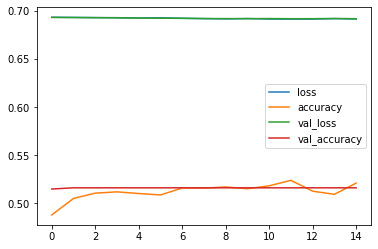

In [58]:
lstm_loss = pd.DataFrame(model_lstm.history.history)
lstm_loss.plot()

# Creating a sequential neural network instance

In [59]:
model = Sequential()

# input layer
model.add(Dense(13,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Train on 7474 samples, validate on 3204 samples
Epoch 1/1000
7474/7474 [==============================] - 0s 65us/sample - loss: 0.6952 - accuracy: 0.5103 - val_loss: 0.6898 - val_accuracy: 0.5836
Epoch 2/1000
7474/7474 [==============================] - 0s 6us/sample - loss: 0.6906 - accuracy: 0.5343 - val_loss: 0.6878 - val_accuracy: 0.5634
Epoch 3/1000
7474/7474 [==============================] - 0s 6us/sample - loss: 0.6910 - accuracy: 0.5403 - val_loss: 0.6856 - val_accuracy: 0.5893
Epoch 4/1000
7474/7474 [==============================] - 0s 6us/sample - loss: 0.6892 - accuracy: 0.5420 - val_loss: 0.6830 - val_accuracy: 0.6145
Epoch 5/1000
7474/7474 [==============================] - 0s 7us/sample - loss: 0.6859 - accuracy: 0.5587 - val_loss: 0.6794 - val_accuracy: 0.6267
Epoch 6/1000
7474/7474 [==============================] - 0s 7us/sample - loss: 0.6826 - accuracy: 0.5619 - val_loss: 0.6755 - val_accuracy: 0.6089
Epoch 7/1000
7474/7474 [==============================] - 0s 6u

<AxesSubplot:>

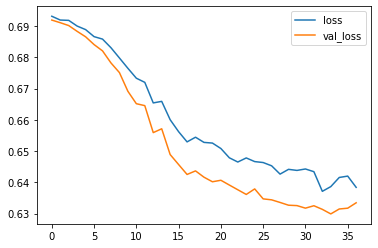

In [54]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Comments

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1607
           1       0.68      0.61      0.64      1597

    accuracy                           0.66      3204
   macro avg       0.66      0.66      0.66      3204
weighted avg       0.66      0.66      0.66      3204

[[1145  462]
 [ 622  975]]


The sequential model acquired an accuracy score of .65 - slightly outperforming the LSTM model (.52). Both models did not have a satisfactory validation loss. This leads me to believe that another model needs to be built that uses the tweets themselves as an input. Regardless of the model I ultimately choose, I will validate my results a test set of pre-labeled tweets. I will either scrape the tweets myself and classify them by hand, or I will find another dataset with tweets already labeled, and use those to validate my model.